In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/salader/dogs-vs-cats")

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats


100%|██████████| 1.06G/1.06G [00:04<00:00, 262MB/s]


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomContrast

In [ ]:
#generators: used for processing large amt of data
train_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/dogs-vs-cats/train',
    labels = 'inferred', #yesle cats lao 0 ra dog lai 1 assign garcha
    label_mode = 'int', 
    batch_size = 32,
    image_size = (256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/dogs-vs-cats/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# hamile mathi img lai numpy arr ma store gareko cha jun chai 0 to 255 samma cha since we using normization ko make the value 0 to 1
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)




In [ ]:
#data augmentation:
data_augmentation=Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1),
    RandomContrast(0.1)

], name='data_augmentation')


In [ ]:
#create cnn model: we creating 3 convulational layers first ma 32 filters 2nd ma 64 filters 3rd ma 128 filters
model=Sequential([
    keras.layers.InputLayer(input_shape=(256,256,3)),

    data_augmentation,

    Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),

    Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),

    Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),

    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(1,activation='sigmoid')
])





/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)       │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
#model compiling:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds, epochs=12, validation_data=validation_ds)

Epoch 1/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 112s 163ms/step - accuracy: 0.5572 - loss: 2.5101 - val_accuracy: 0.5950 - val_loss: 0.6992
Epoch 2/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 139s 167ms/step - accuracy: 0.6091 - loss: 0.6652 - val_accuracy: 0.6510 - val_loss: 0.6256
Epoch 3/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 138s 162ms/step - accuracy: 0.6730 - loss: 0.6042 - val_accuracy: 0.6936 - val_loss: 0.5778
Epoch 4/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 100s 160ms/step - accuracy: 0.7022 - loss: 0.5743 - val_accuracy: 0.7244 - val_loss: 0.5478
Epoch 5/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 104s 167ms/step - accuracy: 0.7420 - loss: 0.5343 - val_accuracy: 0.7322 - val_loss: 0.5072
Epoch 6/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 138s 160ms/step - accuracy: 0.7704 - loss: 0.4909 - val_accuracy: 0.7214 - val_loss: 0.6086
Epoch 7/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 160ms/step - accuracy: 0.7813 - loss: 0.4672 - val_accuracy: 0.7710 - val_loss: 0.4902
Epoch 8/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 104s 166ms/step - accuracy: 0.8074 -

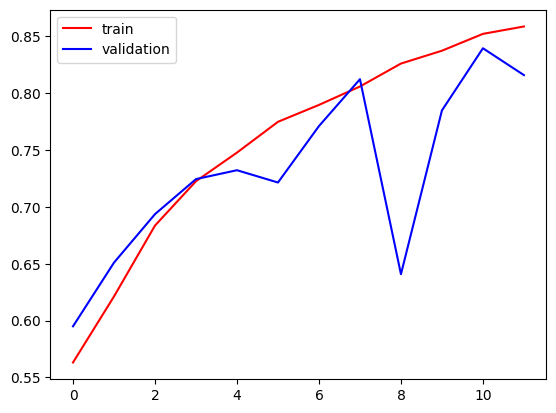

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


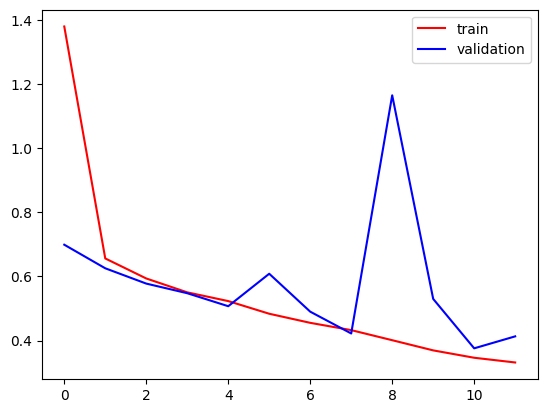

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cats.jpg to cats.jpg


In [ ]:
img_path = list(uploaded.keys())[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


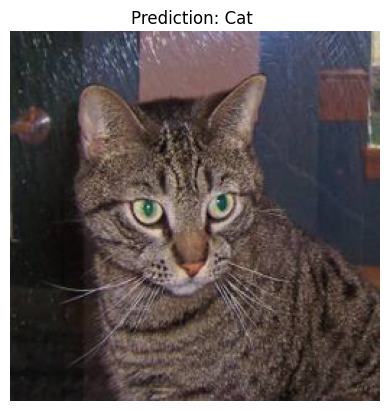

Predicted Label: Cat


In [ ]:
def predict_image(img_path, model):
    img = Image.open(img_path)
    img = img.resize((256, 256))  # Resize to match input shape
    img_array = np.array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  #(1,255,255,3)

    prediction = model.predict(img_array)[0][0]

    # Define Class Labels
    class_names = ["Cat", "Dog"]  
    predicted_label = class_names[1] if prediction >= 0.5 else class_names[0]  

    
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_label} ")
    plt.axis("off")
    plt.show()

    print(f"Predicted Label: {predicted_label}")

predict_image(img_path, model)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dogs.jpg to dogs.jpg


In [ ]:
img_path2 = list(uploaded.keys())[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


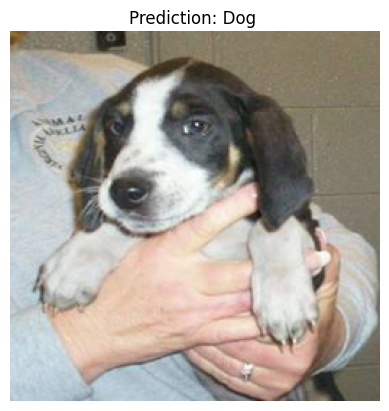

Predicted Label: Dog


In [ ]:
def predict_image(img_path2, model):
    img = Image.open(img_path2)
    img = img.resize((256, 256))  # Resize to match input shape
    img_array = np.array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    prediction = model.predict(img_array)[0][0]

    # Define Class Labels
    class_names = ["Cat", "Dog"]
    predicted_label = class_names[1] if prediction >= 0.5 else class_names[0] #since probability 0 to 1 aaucha 0 bhanda mathi bhanya dog aauca natra 0 aauca. 
    actual_label=class_names[1]
    
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_label} ")
    plt.axis("off")
    plt.show()

    print(f"Predicted Label: {predicted_label}")

predict_image(img_path2, model)

prediction=model.predict(img_array)[0][0]
class_name=['cat','dog']
predicted_label=class_names[1] if prediction>=0.5 else class_name [0]